In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_original = pd.read_csv('BankChurners.csv')
dropColumns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
               'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df = df_original.drop(columns=dropColumns)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [14]:
column_values = ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
index_values = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
incomeAllDf = pd.DataFrame(index = index_values, columns = column_values)
for income in index_values:
    incomeCount = df.loc[df['Income_Category'] == income, ['Education_Level']].value_counts()
    for column in column_values:
        incomeAllDf.loc[income, column] = incomeCount[column].values[0]
incomeAllDf

,Unknown,Uneducated,High School,College,Graduate,Post-Graduate,Doctorate
Unknown,145,185,225,108,332,47,70
Less than $40K,556,522,671,345,1139,170,158
$40K - $60K,269,249,355,183,553,111,70
$60K - $80K,210,195,307,132,422,77,59
$80K - $120K,219,217,308,175,478,81,57
$120K +,120,119,147,70,204,30,37


In [15]:
for column in incomeAllDf.columns:
    incomeAllDf[column] = incomeAllDf[column] / incomeAllDf[column].sum()
incomeAllDf

,Unknown,Uneducated,High School,College,Graduate,Post-Graduate,Doctorate
Unknown,0.0954575,0.124412,0.111773,0.106614,0.106138,0.0910853,0.155211
Less than $40K,0.36603,0.351042,0.333333,0.340573,0.36413,0.329457,0.350333
$40K - $60K,0.17709,0.167451,0.176354,0.180652,0.17679,0.215116,0.155211
$60K - $80K,0.138249,0.131137,0.152509,0.130306,0.13491,0.149225,0.13082
$80K - $120K,0.144174,0.145931,0.153005,0.172754,0.152813,0.156977,0.126386
$120K +,0.0789993,0.0800269,0.0730253,0.0691017,0.0652174,0.0581395,0.0820399


This table represents the realtionship between the study level and the income range proportionally.

<AxesSubplot:>

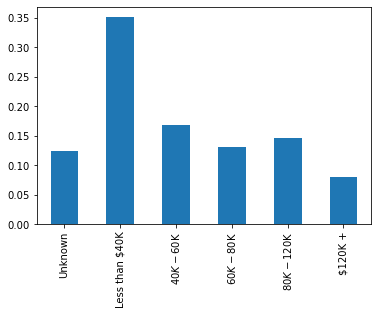

In [57]:
incomeAllDf['Uneducated'].plot(kind='bar')

<AxesSubplot:>

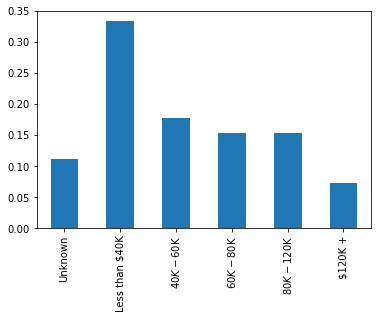

In [58]:
incomeAllDf['High School'].plot(kind='bar')

<AxesSubplot:>

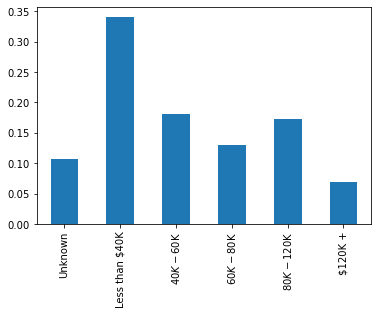

In [59]:
incomeAllDf['College'].plot(kind='bar')

<AxesSubplot:>

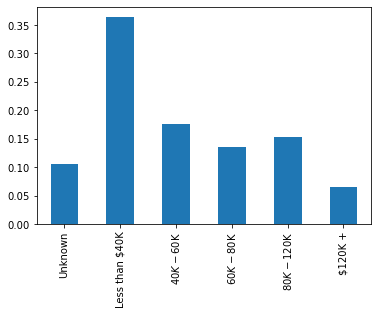

In [60]:
incomeAllDf['Graduate'].plot(kind='bar')

<AxesSubplot:>

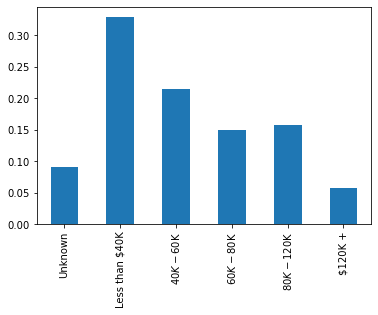

In [61]:
incomeAllDf['Post-Graduate'].plot(kind='bar')

<AxesSubplot:>

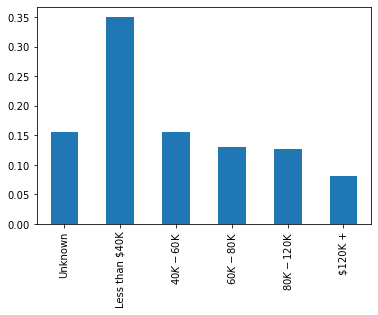

In [62]:
incomeAllDf['Doctorate'].plot(kind='bar')

<AxesSubplot:>

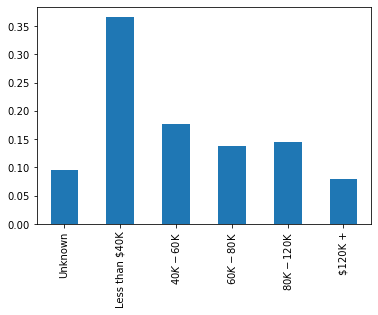

In [63]:
incomeAllDf['Unknown'].plot(kind='bar')

<AxesSubplot:>

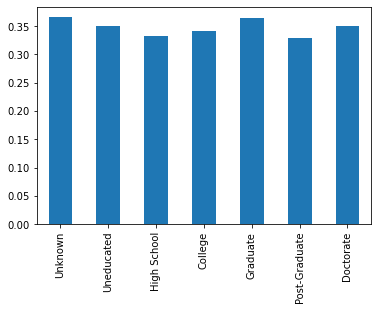

In [64]:
incomeAllDf.loc['Less than $40K', :].plot(kind='bar')

<AxesSubplot:>

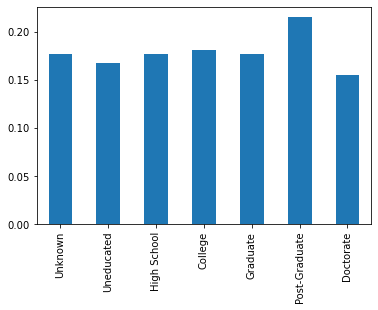

In [77]:
incomeAllDf.loc['$40K - $60K', :].plot(kind='bar')

<AxesSubplot:>

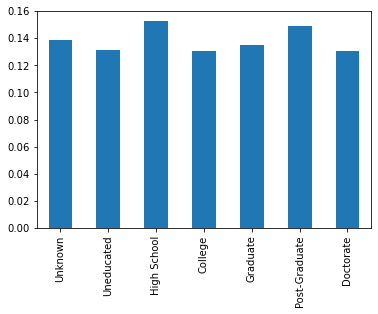

In [76]:
incomeAllDf.loc['$60K - $80K', :].plot(kind='bar')

<AxesSubplot:>

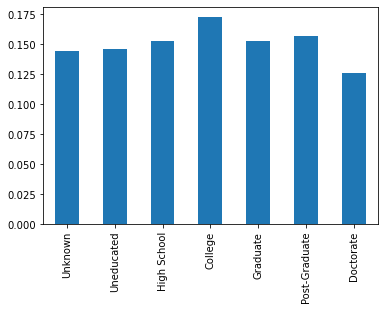

In [78]:
incomeAllDf.loc['$80K - $120K', :].plot(kind='bar')

<AxesSubplot:>

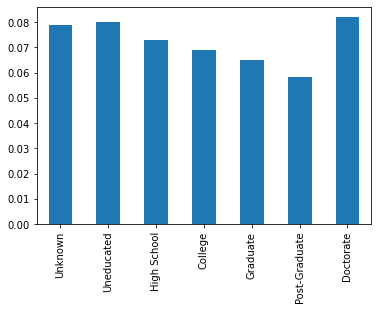

In [66]:
incomeAllDf.loc['$120K +', :].plot(kind='bar')

## Observations

We can observe in the data a trend to get higher salary as higher are the studies made, where the post-graduated ones are the better payd. It is interresting to mention that the Doctorate degree seems to be payed in the same way as uneducated ones. It is also interesting to mention that the higher proportion of people who fit in the higher range of salary are the uneducated and Doctorate ones.

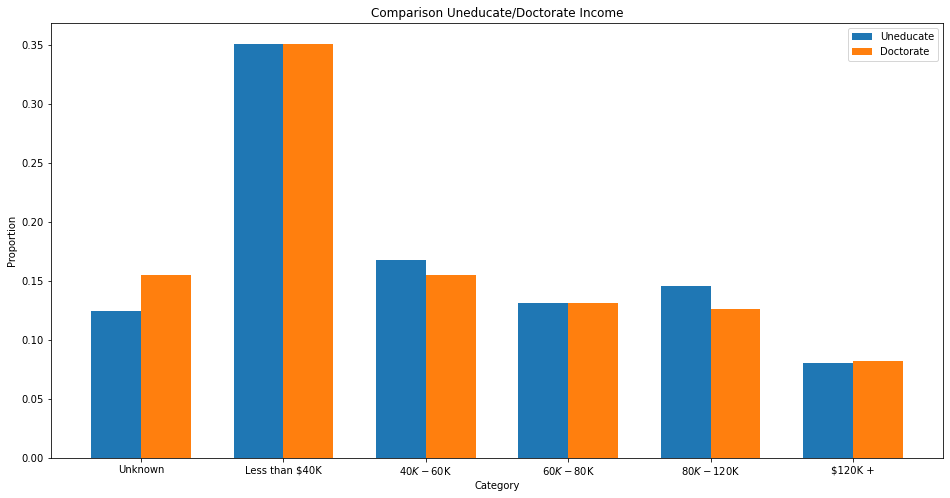

In [16]:
index = np.arange(len(index_values))
bar_width = 0.35

fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
uneducated = ax.bar(index, incomeAllDf['Uneducated'], bar_width, label="Uneducate")

doctorate = ax.bar(index+bar_width, incomeAllDf['Doctorate'], bar_width, label="Doctorate")

ax.set_xlabel('Category')
ax.set_ylabel('Proportion')
ax.set_title('Comparison Uneducate/Doctorate Income')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index_values)
ax.legend()

plt.show()

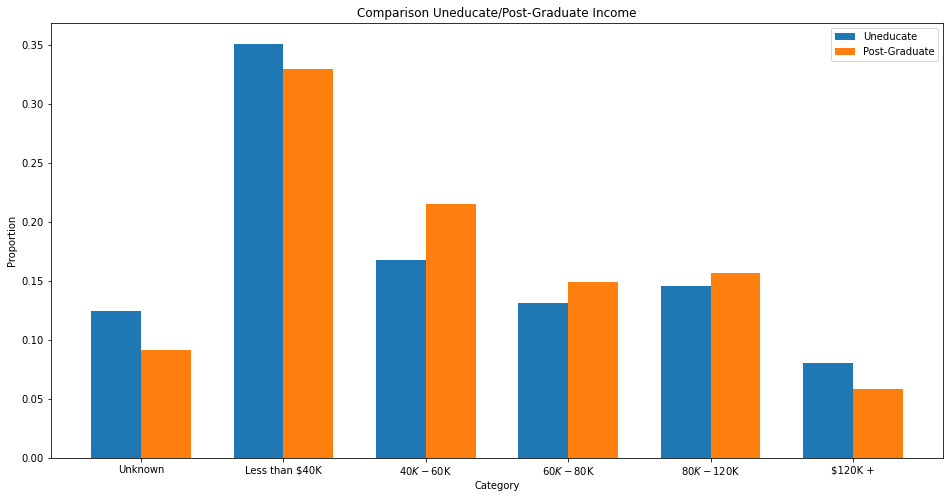

In [17]:
index = np.arange(len(index_values))
bar_width = 0.35

fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
uneducated = ax.bar(index, incomeAllDf['Uneducated'], bar_width, label="Uneducate")

doctorate = ax.bar(index+bar_width, incomeAllDf['Post-Graduate'], bar_width, label="Post-Graduate")

ax.set_xlabel('Category')
ax.set_ylabel('Proportion')
ax.set_title('Comparison Uneducate/Post-Graduate Income')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index_values)
ax.legend()

plt.show()

In [18]:
column_values = ['M', 'F']
index_values = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
incomeAllGe = pd.DataFrame(index = index_values, columns = column_values)
for income in index_values:
    incomeCount = df.loc[df['Income_Category'] == income, ['Gender']].value_counts()
    for column in column_values:
        try:
            incomeAllGe.loc[income, column] = incomeCount[column].values[0]
        except KeyError:
            incomeAllGe.loc[income, column] = 0
incomeAllGe

,M,F
Unknown,52,1060
Less than $40K,277,3284
$40K - $60K,776,1014
$60K - $80K,1402,0
$80K - $120K,1535,0
$120K +,727,0


In [19]:
for column in incomeAllGe.columns:
    incomeAllGe[column] = incomeAllGe[column] / incomeAllGe[column].sum()
incomeAllGe

,M,F
Unknown,0.0109038,0.197835
Less than $40K,0.0580835,0.612915
$40K - $60K,0.162718,0.18925
$60K - $80K,0.293982,0
$80K - $120K,0.32187,0
$120K +,0.152443,0


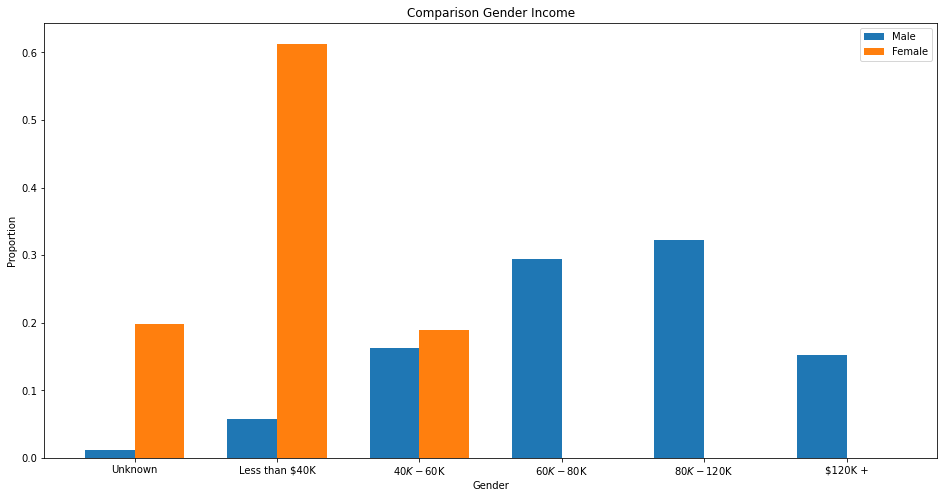

In [20]:
index = np.arange(len(index_values))
bar_width = 0.35

fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
male = ax.bar(index, incomeAllGe['M'], bar_width, label="Male")

female = ax.bar(index+bar_width, incomeAllGe['F'], bar_width, label="Female")

ax.set_xlabel('Gender')
ax.set_ylabel('Proportion')
ax.set_title('Comparison Gender Income')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index_values)
ax.legend()

plt.show()

We can observe in the graph that the majority of the male clients are earning salaries higher than 60K and all the women clients are earning salaries lower than 60k. This leads me to another question, which gender is more prone to churn the bank?

In [21]:
column_values = ['M', 'F']
index_values = ['Existing Customer', 'Attrited Customer']
churnAllGe = pd.DataFrame(index = index_values, columns = column_values)
for index in index_values:
    valueCount = df.loc[df['Attrition_Flag'] == index, ['Gender']].value_counts()
    for column in column_values:
        try:
            churnAllGe.loc[index, column] = valueCount[column].values[0]
        except KeyError:
            churnAllGe.loc[index, column] = 0
churnAllGe

,M,F
Existing Customer,4072,4428
Attrited Customer,697,930


In [22]:
for column in churnAllGe.columns:
    churnAllGe[column] = churnAllGe[column] / churnAllGe[column].sum()
churnAllGe

,M,F
Existing Customer,0.853848,0.826428
Attrited Customer,0.146152,0.173572


In [31]:
churnAllGe.loc['Attrited Customer',][1] / churnAllGe.loc['Attrited Customer',][0]

1.1876125644860955

We can observe that female clients are 18.76% more prone to churn the bank than males.

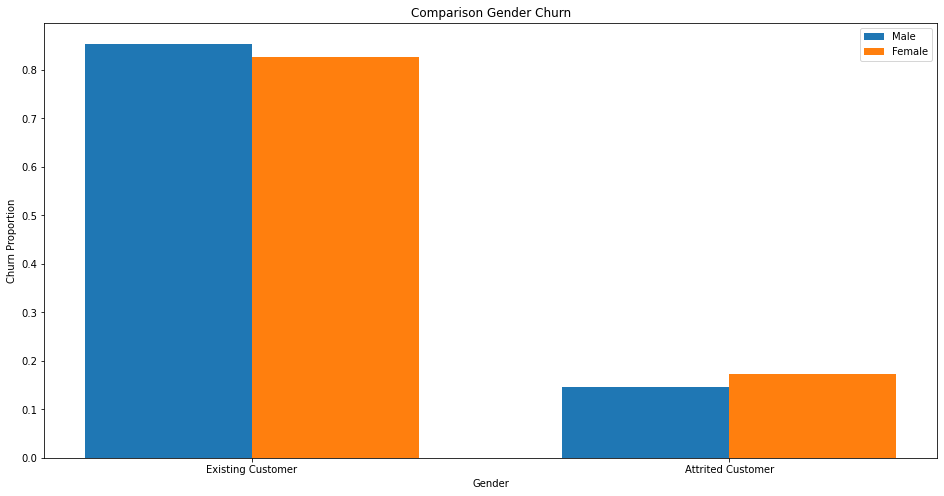

In [26]:
index = np.arange(len(index_values))
bar_width = 0.35

fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

male = ax.bar(index, churnAllGe['M'], bar_width, label="Male")

female = ax.bar(index+bar_width, churnAllGe['F'], bar_width, label="Female")

ax.set_xlabel('Gender')
ax.set_ylabel('Churn Proportion')
ax.set_title('Comparison Gender Churn')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index_values)
ax.legend()

plt.show()